# Introduction to Machine Learning using Decision Tree

<img src="https://scikit-learn.org/stable/_static/ml_map.png"/>

## ML requirements
<b>Data</b> <br>
To develop a ML project, first we need a dataset. <br>

There are hundreds of dataset available online for free and waiting to be used !
- [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)
- [Kaggle datasets](https://www.kaggle.com/datasets)
- [ask google](https://www.google.com/search?ei=R2QMXZD9MNaD8gL4uYPoCw&q=machine+learning+open+datasets&oq=machine+learning+open+datasets&gs_l=psy-ab.3..0i203j0i8i30.5101.6297..6496...1.0..0.128.673.0j6......0....1..gws-wiz.......0i71j35i304i39j0i7i30j0i13j0i8i7i30j0i7i30i19j0i8i7i30i19j0i19j0i8i13i30i19.lyx-wjPDejE)

If you plan to start a ML project at work, it is important to plan from the beginning how to collect and store the data. <br>
It is well known that approx. 80% from a ML project lifecycle is spent on data exploration, data cleaning, data transformation. Pandas python library/Spark are a very good choice for these phases.  


<b>Software (ML libraries) </b> <br>
Yes, it's true that ML algorithms are based on <b>mathematic</b>. But it's also true that most of these algorithms are already <b>implemented in a lot of libraries</b>, so we don't need to know all the math details. <br>
Most of the time, is it enough to have a general understanding of what a ML algorithm does to apply it with success on our project. Of course, if you deep dive into the details implementation, you will start to master it and if you master something you will have a better results. <br>

OK, we know that there are ML libraries to use but what programming languages do we need to know to use them ? <br>
The most common ones are <b>Python and R</b>. There are also libraries written for example in Java, .Net, Scala, but either they are in to early stages, implement only a few algorithms, those algorithms aren't the most efficent ones implemented and have a weak comunity/suport. <br>

Python and R are the most common programming languages when it's about ML. Python has the advantage that has a strong and large community, latest best ML libraries support Python and also it contains complementary libraries which cam be used as regular programming. R language was very used in the past, but it seems to have a descending path in the last years and its main focus is for statistic and ML. 

Most common Python libraries :
- Scikit-learn
- Spark ML
- Theano
- TensorFlow
- Keras
- PyTorch

What is the differences between these libraries/ which one to choose ? 


Nowadays, it's pretty easy to install and use these libraries. We can either install them on our personal computers or access them from cloud services. Because they are so important and useful for software industry, the biggest cloud providers created services around them :
- [Amazon](https://aws.amazon.com/sagemaker/)
- [Microsoft](https://azure.microsoft.com/en-in/services/machine-learning-studio/)
- [Google](https://cloud.google.com/products/ai/)


<b>Hardware</b> <br>
Every software needs hardware. This is also the case for ML. <br>
Hardware specifications are related to the type of ML project and mostly to the volume of data. If the volume of data is big, we clearly will need more resources(CPU, memory, disk) to proccess it. <br>

For computer vision, is indicated to have a [GPU](https://en.wikipedia.org/wiki/Graphics_processing_unit), a good processor and few tens of memory gigabytes. For traditional ML datasets, where most of the time we have [structure data](https://en.wikipedia.org/wiki/Data_structure) and few hundreds of megabytes, gigabytes of data is enough a commodity hardware(ex. 4 cores, 8 GBs RAM) . <br>

BUT, if you want to start learning ML, hardware is not an escuse. You can find a small dataset, a lightweight library and this will ran very fast even on the cheapest laptop/PC. <br>

If you are not sure that ML if for you and you are skeptical about investing in hardware, you can choose a cloud solution. In this case you can rent hardware and pay as much as you consume. Nowadays, these services are pretty cheap. Look at [amazon prices](https://aws.amazon.com/ec2/pricing/)

 



## Our workshop setup

Dataset
- [Titanic dataset](https://data.world/nrippner/titanic-disaster-dataset)

Software 
- [jupyter notebook](https://jupyter.org/)
- [python](https://www.python.org/)
- [sklearn](https://scikit-learn.org/stable/)
- [pandas](https://pandas.pydata.org/)
- [matplotlib](https://matplotlib.org/)
- [woodpecker](https://github.com/tlapusan/woodpecker)

Hardware
- [Lentiq](https://lentiq.com/)
- Your own laptop


## Main steps for each ML project

- read the data
- data exploration
- data cleaning and data transformation
- initializing and fitting ML models
- model validation
- model structure interpretation
- hyperparameter tuning

# Classification algorithms : DecisionTree and RandomForest

## Imports

Imports in Python, as in any other programming language, is the ways to include other library funtionalities.

Read more from [official docs](https://docs.python.org/3/reference/import.html) about Python imports

In [1]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold

import graphviz
from graphviz import Source
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
pd.options.display.max_columns = 999
pd.options.mode.chained_assignment = None  # default='warn'

## Util functions

In [3]:
def save_decision_tree_structure(_decision_tree, _filename, _features):
    graph = Source(tree.export_graphviz(_decision_tree, feature_names=_features, class_names=["0", "1"],
                                                filled=True, node_ids=True))
    graph.format = 'png'
    graph.render(filename=_filename,view=True)
    
# save_decision_tree_structure(dt_v3, "decision_tree_classifier_sample", features_param=feature_set_v3)

def show_features_importance(decision_tree, features, figsize=(20, 10)):
        """Visual representation of features importance.


        Features are ordered descending by their importance using a bar plot visualisation.
        oX contains features name and oY contains features importance.

        :param figsize: tuple
            the size (x, y) of the plot (default is (20, 10))
        :return: None
        """

        feature_names, feature_importances = zip(
            *sorted(list(zip(decision_tree.feature_importances_, features)), key=lambda tup: tup[0],
                    reverse=True))
        plt.figure(figsize=figsize)
        plt.bar(feature_importances, feature_names)
        plt.xlabel("feature name", fontsize=20)
        plt.ylabel("feature importance", fontsize=20)
        plt.grid()
        plt.show()
        
def show_decision_tree_structure(decision_tree, features):
        """Show decision woodpecker structure as a binary woodpecker.

        It is just an utility method for graphviz functionality to render a decision woodpecker structure.

        :return: graphviz.files.Source
        """

        dot_data = tree.export_graphviz(decision_tree, out_file=None, feature_names=features,
                                                filled=True, node_ids=True)
        return graphviz.Source(dot_data)

## Dataset

What are we trying to solve ?

The dataset is related to the sinking of the Titanic ship. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships. <br>
If you are new to a domain, in this case ship disaster, machine learning should help us to understand also the dataset, to get domain knowledge, not only to make predictions !

[Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic) <br>

Before start to work on a ML project, it's important to understand what we want to achive. <br>
<b>Our goal is to predict which passengers survived the tragedy ! </b> <br> <br>




Depending of what we need to predict, the ML algorithms are devided in two main subclasses : <br>
<b>Classification </b>
- we need to predict a class/label (a limited set of values), ex. email is span or not spam, healty or not healty
- the most common is the binary classification, where we need to predict between two classes
- when we need to predict multiple classes, the problem is known as multi-class classification

<b>Regression </b>
- we need to predict a real-value, such as an integer or floating point value, ex price, age, distance 

[Differences between Classification and Regression](https://machinelearningmastery.com/classification-versus-regression-in-machine-learning/)

Above subclasses of algorithms are making part from supervised learning. Why? Because we trained the algorithms based on a known label y (ground truth). Unsupervised learning, on the other hand, does not have labels, so its goal is to infer the natural structure present within a set of data points. [Read more](https://towardsdatascience.com/supervised-vs-unsupervised-learning-14f68e32ea8d)

### Read the data

In [4]:
dataset = pd.read_csv("../dataset/titanic/titanic.csv")

In [5]:
dataset.head(10)

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,True,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,True,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,1,False,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,1,False,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,1,False,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S
5,1,True,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S
6,1,True,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S
7,1,False,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S
8,1,True,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S
9,1,False,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C


Any machine learning algorithm needs data from where to learn and make relevant predictions ! <br>
In our world, we can find a lot of dataset types, like structure datasets, raw text, images, video, sounds, etc.



[Pandas](http://pandas.pydata.org/) is the most popular library in Python for working with structured datasets. 

During the development of a ML project, working with data is typically devided into multiple stages :
- data transformation and data cleaning
- data analysis, visualisations
- data modeling using ML algorithms

Pandas is the ideal tool for all of these tasks. The main data structures in Pandas are Series (1-dimensional) and DataFrame (2-dimensional).

Pandas DataFrame (can be seen as a SQL table) :
- easy handling of missing data
- add/delete columns 
- powerfull groupby, joins funtionalities
- can read from CSV, excel, databases, json, parquet, etc


[Official docs](http://pandas.pydata.org/pandas-docs/stable/) <br>
[Python for Data Analysis book](https://www.amazon.com/Python-Data-Analysis-Wrangling-IPython/dp/1449319793)





## Initial data analysis

When working on a ML project we can start with at least two approaches : <br><br>
<b>Data driven approach</b><br>
It assume to start looking at the data, to make a lot of visualisations, discover patterns. By doing this we are making a lot of assumptions about the data and what kind of information we should put in our ML model. <br>
In this way, the model could learn from our assumptions, which in some cases can be limited or incorect.


<b>ML drive approach </b><br>
This approach assume to look at the data just enough to make it ready for training a ML model (handle missing values, categorical features, etc). After we have a model trained on this data, we interprete its result, structure, behavior and based on these investigations we make assumptions about the data.

<br>
Choose which one fits for you !

### Columns description
<b>pclass </b>: A proxy for socio-economic status (SES). 1st = Upper, 2nd = Middle, 3rd = Lower <br>
<b>survived</b> : True = survived, False = didn't survive <br>
<b>name</b> : passanger name <br>
<b>gender</b> : passanger gender, male or female <br>
<b>age</b> : passanger age <br>
<b>sibsp</b> : # of siblings / spouses aboard the Titanic <br>
<b>parch</b> : # of parents / children aboard the Titanic <br>
<b>ticket</b> : passanger ticket number <br>
<b>fare</b> : passenger fare <br>
<b>embarked</b> : Port of embarkation, C = Cherbourg, Q = Queenstown, S = Southampton <br>

In [6]:
dataset.head(3)

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,True,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,True,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,1,False,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S


### Dataset size

In [7]:
dataset.shape

(1309, 11)

### Check column datatypes

In [8]:
dataset.dtypes

pclass        int64
survived       bool
name         object
gender       object
age         float64
sibsp         int64
parch         int64
ticket       object
fare        float64
cabin        object
embarked     object
dtype: object

### Column summarize

In [9]:
dataset.describe()

,pclass,age,sibsp,parch,fare
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479
std,0.837836,14.413500,1.041658,0.865560,51.758668
min,1.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,80.000000,8.000000,9.000000,512.329200


### Check for missing data

In [10]:
dataset.isna().any()

pclass      False
survived    False
name        False
gender      False
age          True
sibsp       False
parch       False
ticket      False
fare         True
cabin        True
embarked     True
dtype: bool

In [11]:
dataset.isna().sum()

pclass         0
survived       0
name           0
gender         0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
dtype: int64

### Visualisations
We understand better and faster if we look visually at the data. <br>
Python community developed a lot of useful libraries for visualistions, but the most used one is [matplotlib](https://matplotlib.org/). Check [here](https://mode.com/blog/python-data-visualization-libraries) for other popular libraries. <br> 


The most common types of visualisations are histograms, line plots and scatter plots.

In [12]:
dataset.head(10)

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,True,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,True,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,1,False,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,1,False,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,1,False,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S
5,1,True,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S
6,1,True,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S
7,1,False,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S
8,1,True,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S
9,1,False,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C


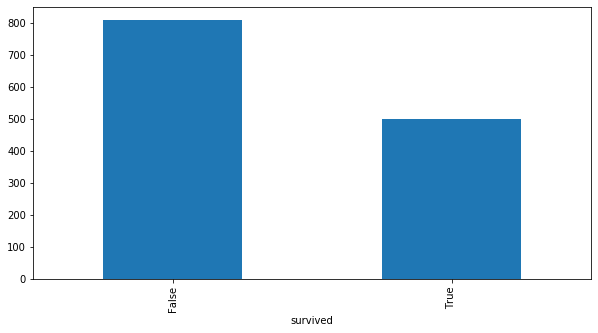

In [13]:
plt.figure(figsize=(10,5))
dataset.groupby(["survived"]).size().plot.bar()

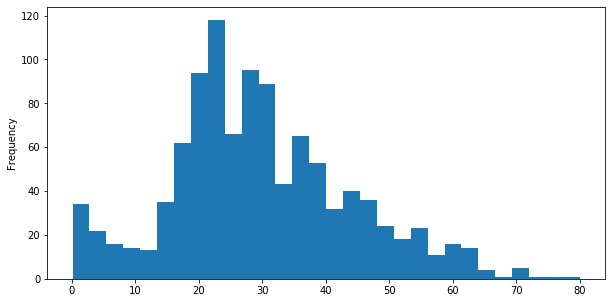

In [14]:
plt.figure(figsize=(10,5))
dataset.age.plot.hist(bins=30)

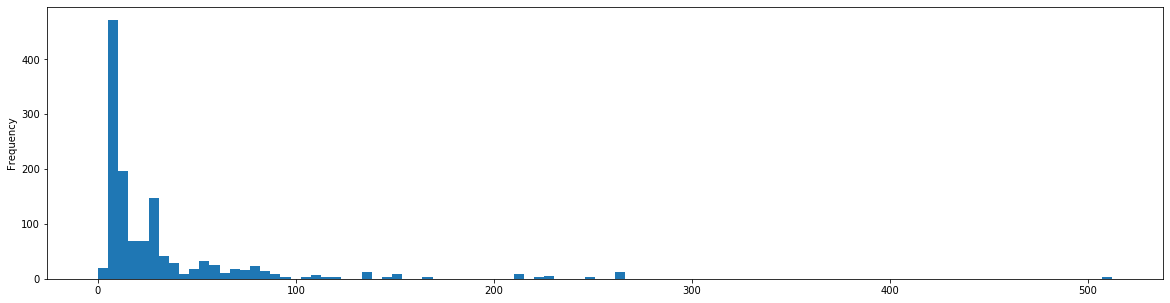

In [15]:
plt.figure(figsize=(20,5))
dataset.fare.plot.hist(bins=100)

In [16]:
print(f"fare mean {dataset.fare.mean()}, fare median {dataset.fare.median()}")

fare mean 33.29547928134557, fare median 14.4542


## Decision Tree Classifier

A Decision Tree is simple a tree of decisions ! <br>
The tree is build based on the data and an algorithm([ID3, C4.5, CART](https://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart)) <br>

Most of ML libraries implement Decision Trees. Take a look at Sklearn implementations for [classification](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) and for [regression](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor)


<img src='https://raw.githubusercontent.com/tlapusan/tree_based_models_workshop/master/resources/images/decision_tree_sample_2.png' />



Main advantages of DecisionTree :
- can be used for both classification and regression
- don't require too much feature enginner
- they are interpretable
- they have pretty good results
- easy to learn and understand
- they are the base for other performant models, like RandomForest, XGBoost.


### Feature selection

A machine learning algorithm understand a dataset using its features (X) and target variable (y) ! <br>
Features are the input properties from the dataset, on which the model is trained to make good predictions for target variable. <br>

In [17]:
dataset.head(5)

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,True,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,True,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,1,False,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,1,False,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,1,False,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S


In [18]:
feature_set_v1 = ["pclass", "gender", "age", "sibsp", "parch", "ticket", "fare", "cabin", "embarked"]
target = "survived"

In [19]:
dataset[feature_set_v1 + [target]].head(3)

,pclass,gender,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,female,29.0000,0,0,24160,211.3375,B5,S,True
1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,True
2,1,female,2.0000,1,2,113781,151.5500,C22 C26,S,False


### Initializing and training a DecisionTreeClassifier

In [20]:
dt = DecisionTreeClassifier(max_depth=10)

In [21]:
dt.fit(dataset[feature_set_v1], dataset[target])

ValueError: could not convert string to float: 'female'

### Feature encoding

In [22]:
dataset.head(5)

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,True,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,True,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,1,False,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,1,False,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,1,False,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S


In Machine Learning we have two main types of features : <br>
- <b>Numerical features </b> <br>
    Like age, price, duration
- <b>Categorical features</b>
    - nominal features <br>
    We don't have any logical order for feature values. ex. color, job, weather conditions, 
    - ordinal features <br>
    We have a logical order. ex. education, month, t-shirt size

There are many ways to convert a categorical feature into a numerical one, almost each ML related library contains one. <br>

One of the most populars are : <br>
sklearn : [LabelEncoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) <br>
pandas : [Categorical data](http://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html)

<br>
<b>Pandas categorical data types </b><br>
Categorical data types are using integer values  to represent the raw values from a column. <br>
Behind, pandas is using a dictionary to keep all the mappings between integer values and raw values. Beside encoding functionality, categorical values can be used for memory saving.
 


In [23]:
# convert a string type to categorical type
dataset.gender.astype("category")

0       female
1         male
2       female
3         male
4       female
5         male
6       female
7         male
8       female
9         male
10        male
11      female
12      female
13      female
14        male
15        male
16        male
17      female
18      female
19        male
20        male
21      female
22        male
23      female
24      female
25        male
26        male
27      female
28      female
29        male
         ...  
1279    female
1280      male
1281      male
1282      male
1283      male
1284      male
1285      male
1286    female
1287      male
1288      male
1289      male
1290    female
1291      male
1292      male
1293      male
1294      male
1295      male
1296      male
1297      male
1298      male
1299      male
1300    female
1301      male
1302      male
1303      male
1304    female
1305    female
1306      male
1307      male
1308      male
Name: gender, Length: 1309, dtype: category
Categories (2, object): [female, male]

In [24]:
dataset.gender.astype("category").cat.codes

0       0
1       1
2       0
3       1
4       0
5       1
6       0
7       1
8       0
9       1
10      1
11      0
12      0
13      0
14      1
15      1
16      1
17      0
18      0
19      1
20      1
21      0
22      1
23      0
24      0
25      1
26      1
27      0
28      0
29      1
       ..
1279    0
1280    1
1281    1
1282    1
1283    1
1284    1
1285    1
1286    0
1287    1
1288    1
1289    1
1290    0
1291    1
1292    1
1293    1
1294    1
1295    1
1296    1
1297    1
1298    1
1299    1
1300    0
1301    1
1302    1
1303    1
1304    0
1305    0
1306    1
1307    1
1308    1
Length: 1309, dtype: int8

In [25]:
def encode_columns_as_categories(_dataset, _column_set):
    for column in _column_set:
        if dataset[column].isna().any():
            dataset[f"{column}_missing"] = dataset[column].isna()
            
        _dataset[f"{column}_cat"] = _dataset[column].astype("category").cat.codes

In [26]:
encode_columns_as_categories(dataset, ["gender", "ticket", "cabin", "embarked"])

In [27]:
dataset.head(5)

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,gender_cat,ticket_cat,cabin_missing,cabin_cat,embarked_missing,embarked_cat
0,1,True,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,0,187,False,43,False,2
1,1,True,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1,49,False,79,False,2
2,1,False,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0,49,False,79,False,2
3,1,False,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,1,49,False,79,False,2
4,1,False,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0,49,False,79,False,2


In [28]:
dataset.dtypes

pclass                int64
survived               bool
name                 object
gender               object
age                 float64
sibsp                 int64
parch                 int64
ticket               object
fare                float64
cabin                object
embarked             object
gender_cat             int8
ticket_cat            int16
cabin_missing          bool
cabin_cat             int16
embarked_missing       bool
embarked_cat           int8
dtype: object

In [29]:
features_v2 = ["pclass", "gender_cat", "age", "sibsp", "parch", "ticket_cat", "fare", "cabin_cat", "cabin_missing", "embarked_cat", "embarked_missing"]

In [30]:
dt.fit(dataset[features_v2], dataset[target])

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

### Handle missing values
Having missing data in our datasets is pretty common. It can be caused by human error, software bug or simple the value isn't known. <br> 
Possible values for missing values are :  ‘NaN’, ‘NA’, ‘None’, ‘ ’, ‘?’, etc

The simplest solution is to remove the rows with missing values. The main disadvantage of this method is that we remove information from our dataset.

Another solution is to fill the missing data with some values. For numerical features, the most common method is to replace by mean or median (if there are ourliers). For categorical features, we can replace by the most frequent value.



In [31]:
dataset[features_v2].isna().any()

pclass              False
gender_cat          False
age                  True
sibsp               False
parch               False
ticket_cat          False
fare                 True
cabin_cat           False
cabin_missing       False
embarked_cat        False
embarked_missing    False
dtype: bool

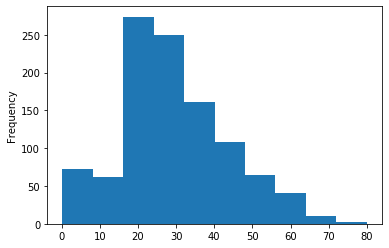

In [32]:
dataset.age.plot.hist()

In [33]:
dataset.age.mean()

29.8811345124283

In [34]:
dataset["age_missing"] = dataset.age.isna()
dataset["fare_missing"] = dataset.fare.isna()
dataset.fillna({"age":dataset.age.mean(), "fare":dataset.fare.median()}, inplace=True)

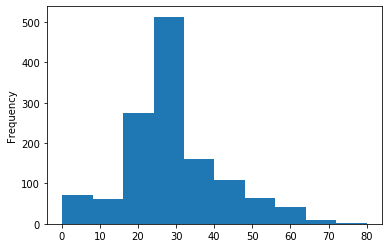

In [35]:
dataset.age.plot.hist()

In [36]:
features_v3 = ["pclass", "gender_cat", "age", "age_missing", "sibsp", "parch", "ticket_cat", "fare", "fare_missing", "cabin_cat", "cabin_missing", "embarked_cat", "embarked_missing"]


In [37]:
dt.fit(dataset[features_v3], dataset[target])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

We succeded to train our first DecisionTreeClassifier model !!! <br>
To reach this step, we needed to :
 - load the dataset
 - to know what we are trying to solve 
 - to make the dataset ready for the model. 
 
We needed to encode categorical features into numerical features and to handle missing data. These operations are known under the concept of <b>feature engineering</b>. <br>
In our case, we spend only a few time on feature enginner, but in real use-cases we need to spend a lot of time, mostly because the dataset isn't in a good shape, like this one. <br>

<b>Most of the time, good feature enginner would reflect in better model performance. <b>








### Prediction description

Let's take 10 random samples from our dataset.

In [38]:
dataset_predictions = dataset.sample(frac=1).head(10)

In [39]:
dataset_predictions[features_v3 + [target]]

,pclass,gender_cat,age,age_missing,sibsp,parch,ticket_cat,fare,fare_missing,cabin_cat,cabin_missing,embarked_cat,embarked_missing,survived
1223,3,0,23.0,False,0,0,777,7.5500,False,-1,True,2,False,True
263,1,0,39.0,False,1,0,93,55.9000,False,161,False,2,False,True
673,3,1,20.0,False,0,0,242,4.0125,False,-1,True,0,False,False
825,3,1,9.0,False,5,2,775,46.9000,False,-1,True,2,False,False
185,1,1,42.0,False,0,0,114,26.5500,False,-1,True,2,False,False
654,3,1,20.0,False,0,0,274,7.2250,False,-1,True,0,False,False
496,2,1,30.0,False,0,0,307,13.0000,False,-1,True,2,False,False
354,2,1,25.0,False,1,0,162,26.0000,False,-1,True,2,False,False
862,3,0,22.0,False,0,0,696,8.9625,False,-1,True,2,False,True
1301,3,1,45.5,False,0,0,236,7.2250,False,-1,True,0,False,False


DecisionTreeClassifier contains predict and predict_proba methods for making predictions : <br>
- predict method returns the predicted class 
- predict_proba returns the class probabilities 

In [40]:
dt.predict(dataset_predictions[features_v3])

array([ True,  True, False, False, False, False, False, False, False,
       False])

In [41]:
dt.predict_proba(dataset_predictions[features_v3])

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.86153846, 0.13846154],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.86153846, 0.13846154],
       [0.93172691, 0.06827309],
       [0.93172691, 0.06827309],
       [0.85714286, 0.14285714],
       [0.96226415, 0.03773585]])

### Model validation

The role of model validation is to check the model performance ! <br>

In our case, we need to correctly classify if a person survived or didn't survived. So, our model should predict as many as possible, the correct answers.

The metric we should use is the accuracy metric. It tells us the percentage of correct predictions made by our model, in others words : accuracy = (number of corrent predictions / total number of predictions). <br>
[Check for others validation metrics for classification](https://scikit-learn.org/stable/modules/classes.html#classification-metrics)



In [42]:
accuracy_score(dataset[target], dt.predict(dataset[features_v3]))

0.9167303284950343

### Validation strategies  

The rule number one : validation strategy should reflect as much as possible how the model will behave in production. <br>

The most common validation strategy is holdout method, where we split our dataset in two parts, training and validation datasets. <br>
One splitting method would be to shuffle the data and choose 70% of them in training and 30% into validation. 

In [43]:
random_state = 1987

In [44]:
train, validation = train_test_split(dataset, train_size=0.7, random_state=random_state, stratify = dataset.survived)

In [45]:
print(f"train size {train.shape[0]}")
print(f"validation size {validation.shape[0]}")

train size 916
validation size 393


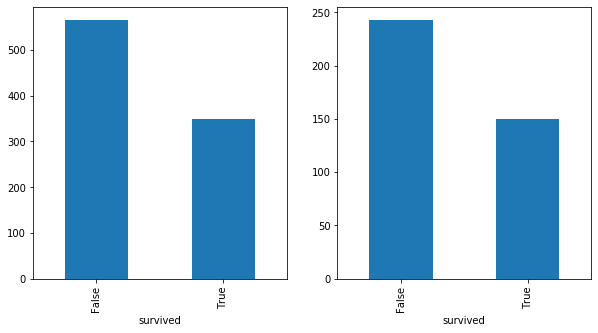

In [46]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
train.groupby("survived").size().plot.bar()
plt.subplot(1,2,2)
validation.groupby("survived").size().plot.bar()

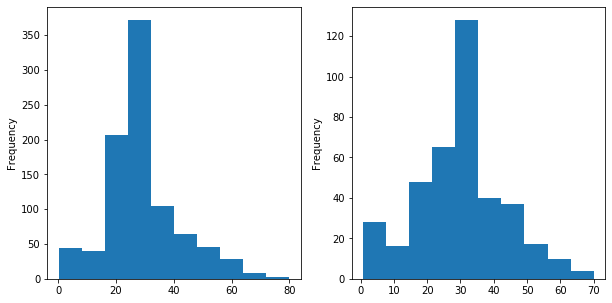

In [47]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
train.age.plot.hist()
plt.subplot(1,2,2)
validation.age.plot.hist()

In [48]:
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(train[features_v3], train[target])


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [49]:
print(f"training accuracy {accuracy_score(train[target], dt.predict(train[features_v3]))}")
print(f"validation accuracy {accuracy_score(validation[target], dt.predict(validation[features_v3]))}")

training accuracy 0.9279475982532751
validation accuracy 0.7659033078880407


### Underfitting and overfitting

The performance of a ML model can be in three states :
- Underfitting, when the model cannot learn and find patterns into the data, so it perform badly both on training and validation datasets
- Overfitting, when the model learns too well every small details from training dataset, so it's a big chance to have poor performance on validation dataset(it will not generalize)
- Appropriate fitting - the ideal scenario, when the model will have good performance on both training and validation datasets

<img src="https://raw.githubusercontent.com/tlapusan/tree_based_models_workshop/master/resources/images/underfitting_overfitting.png" />

### Model interpretation
A ML project can have two main purposes : <br> 
 - to make predictions and to use them in production
 - to understand your data and to get domain knowledge
 

In [50]:
save_decision_tree_structure(dt, "dt_sample", features_v3)

#### Woodpecker
Most of the time, to build a performant Decision Tree, we need to build a complex tree, with many levels and a lot of nodes. <br>
In this scenarios, Decision Tree is losing one of its main advantage : interpretability

This is the main reason I started to create a library from scratch, [woodpecker](https://github.com/tlapusan/woodpecker), to help me to interprete the decision tree structure, even if it's very big.


In [51]:
#pip install git+https://github.com/tlapusan/woodpecker.git

In [52]:
from woodpecker.decision_tree_structure import DecisionTreeStructure

In [53]:
dts = DecisionTreeStructure(dt, train, features_v3, target)

##### Feature importance
Feature importance is one of the first visualisation I make for model interpretation.

Question : What we can obtain from feature importance ?
 - focus on most important dataset columns, make more visualisations with them
 - discuss with a business analyst, client and debate on them
 - discover potential data leakages
 - give you a clue if you are on the right way

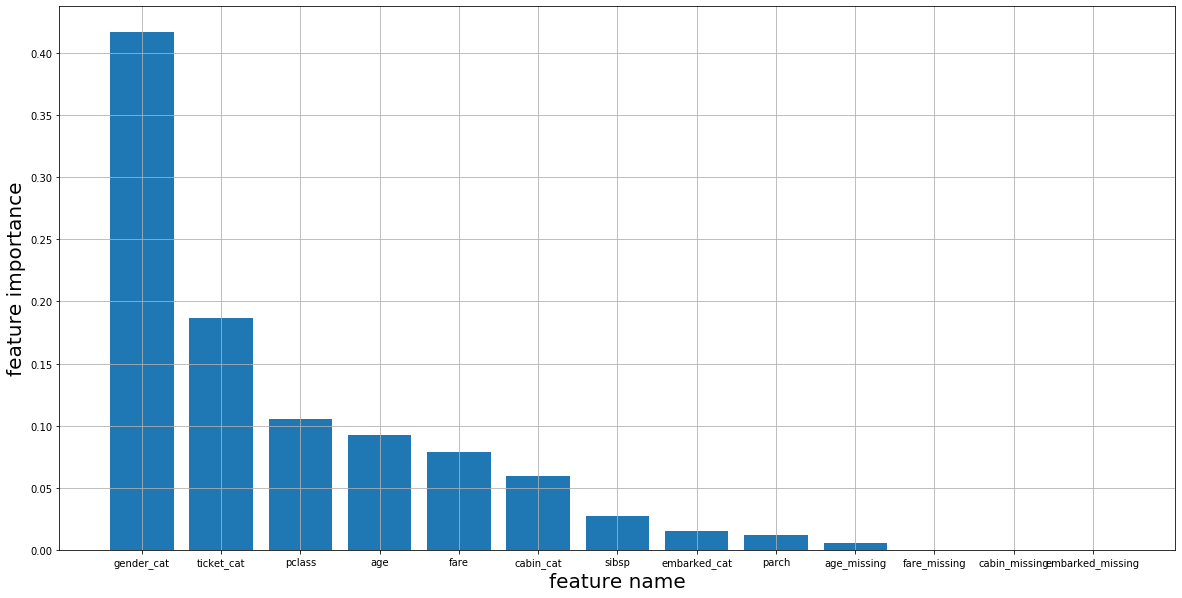

In [54]:
dts.show_features_importance()

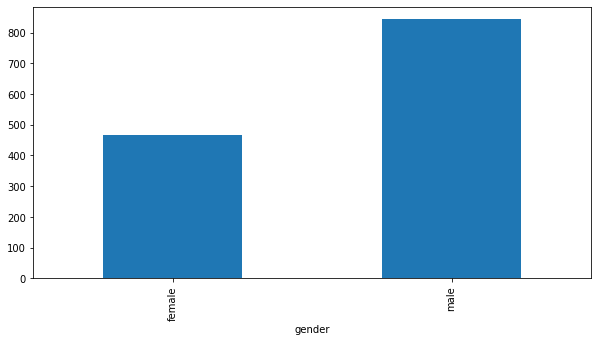

In [55]:
plt.figure(figsize=(10,5))
dataset.groupby("gender").size().plot.bar()

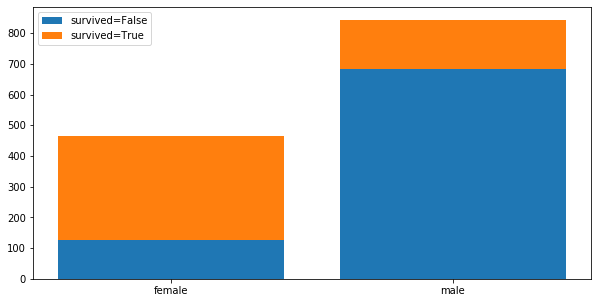

In [56]:
survive_gender_corr = dataset.groupby(["survived", "gender"]).size()
plt.figure(figsize=(10,5))
plt.bar(survive_gender_corr[0].keys().values, survive_gender_corr[0].values, label="survived=False")
plt.bar(survive_gender_corr[1].keys().values, survive_gender_corr[1].values, bottom=survive_gender_corr[0].values, label="survived=True" )
plt.legend()


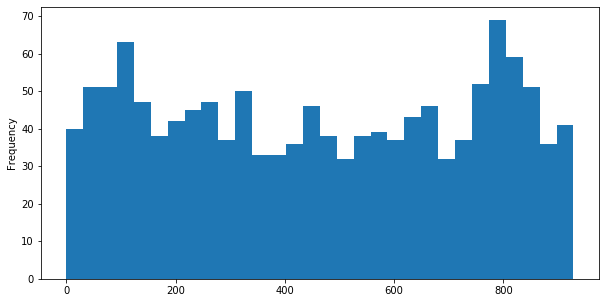

In [57]:
plt.figure(figsize=(10,5))
dataset.ticket_cat.plot.hist(bins=30)


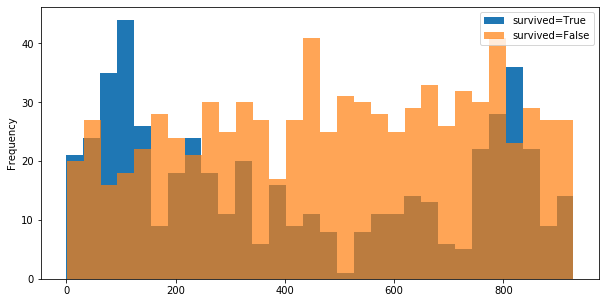

In [58]:
plt.figure(figsize=(10,5))
dataset[dataset.survived==True].ticket_cat.plot.hist(bins=30, label="survived=True")
dataset[dataset.survived==False].ticket_cat.plot.hist(bins=30, label="survived=False", alpha=0.7)
plt.legend()

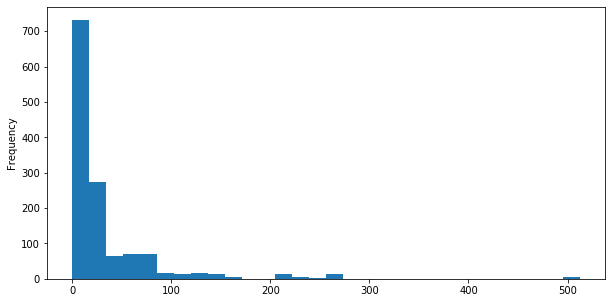

In [59]:
plt.figure(figsize=(10,5))
dataset.fare.plot.hist(bins=30)

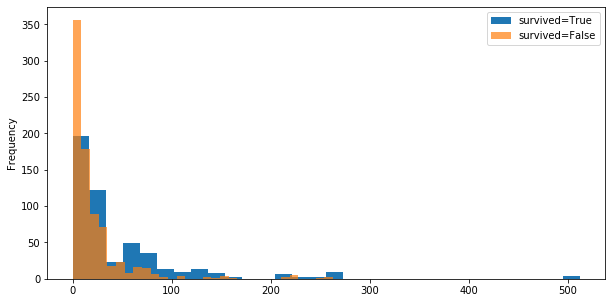

In [60]:
plt.figure(figsize=(10,5))
dataset[dataset.survived == True].fare.plot.hist(label="survived=True", bins=30)
dataset[dataset.survived == False].fare.plot.hist(label="survived=False", bins=30, alpha=0.7)
plt.legend()

##### Leaf impurity

Question : what is the principle after which the tree is built?

For DecisionTreeClassifier we need to find the best splits based on node impurities. A node with impurity 0 means that it contains samples only from one class (ideal scenario). If the impurity is bigger than 0, it means that the node contains samples from both classes. <br>
Algorithm target is to create nodes with impurity as close as possible to 0. 

Common measures of impurity are [gini, entropy and misclasificaion](https://scikit-learn.org/stable/modules/tree.html#classification-criteria). 

<img src="https://raw.githubusercontent.com/tlapusan/tree_based_models_workshop/master/resources/images/node_impurity.png" alt="drawing" width="60%" height="60%"/>

Information gain (IG) is used to select the best split. <br>
The feature which generate the biggest IG is chosen to split the node.

<img src="https://raw.githubusercontent.com/tlapusan/tree_based_models_workshop/master/resources/images/information_gain.png" alt="drawing" width="60%" height="60%"/>

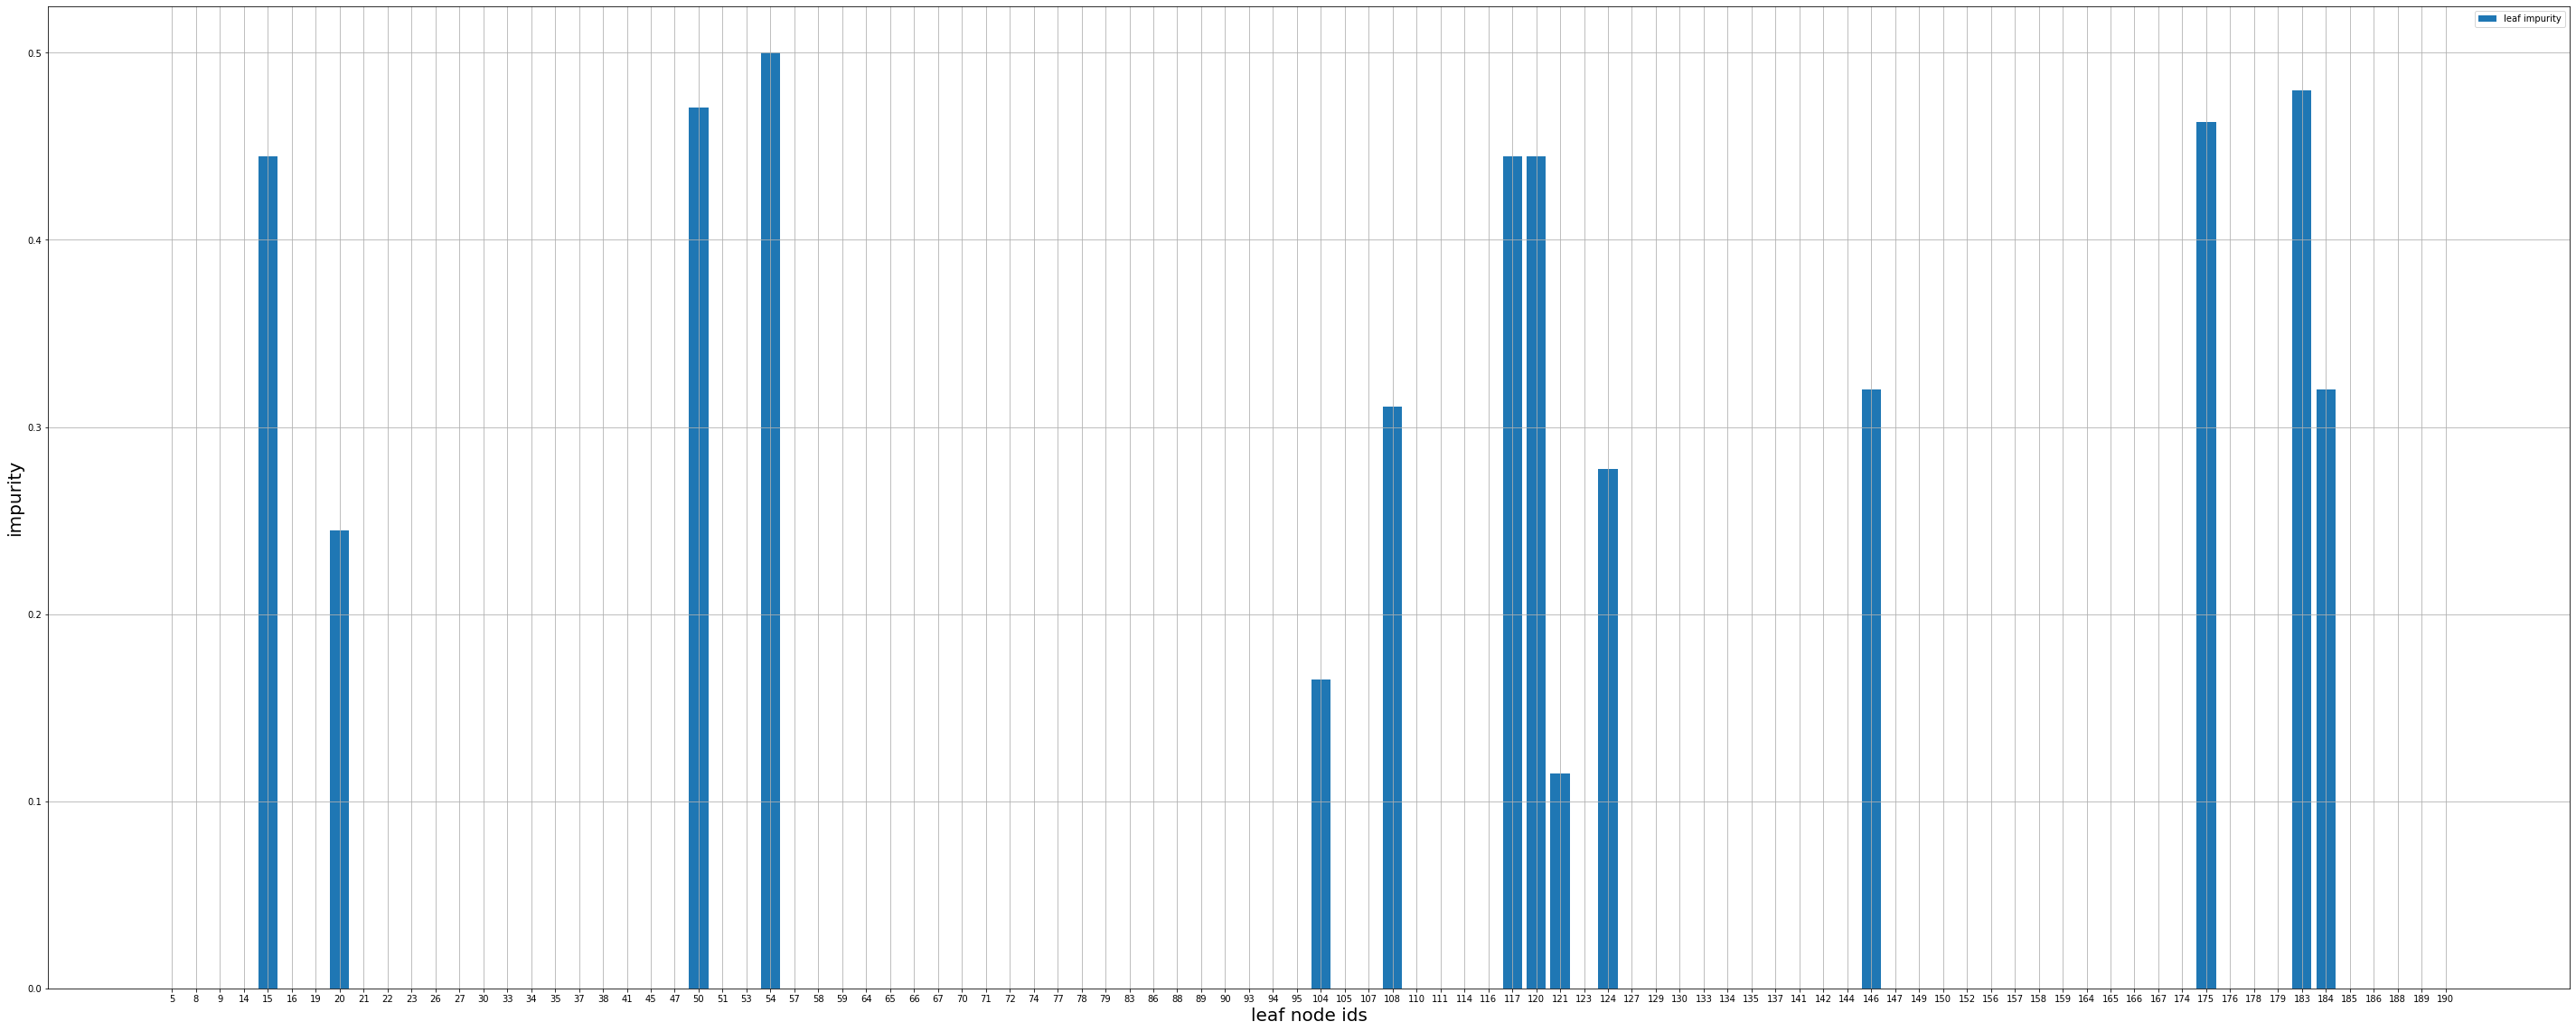

In [61]:
dts.show_leaf_impurity(figsize=(50,20))

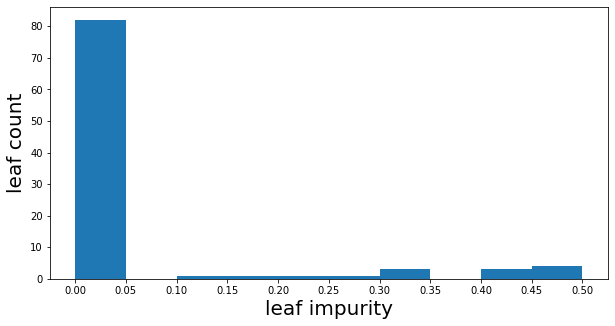

In [62]:
dts.show_leaf_impurity_distribution(figsize=(10,5))

##### Leaf samples

Does the number of samples from leaves matter ?

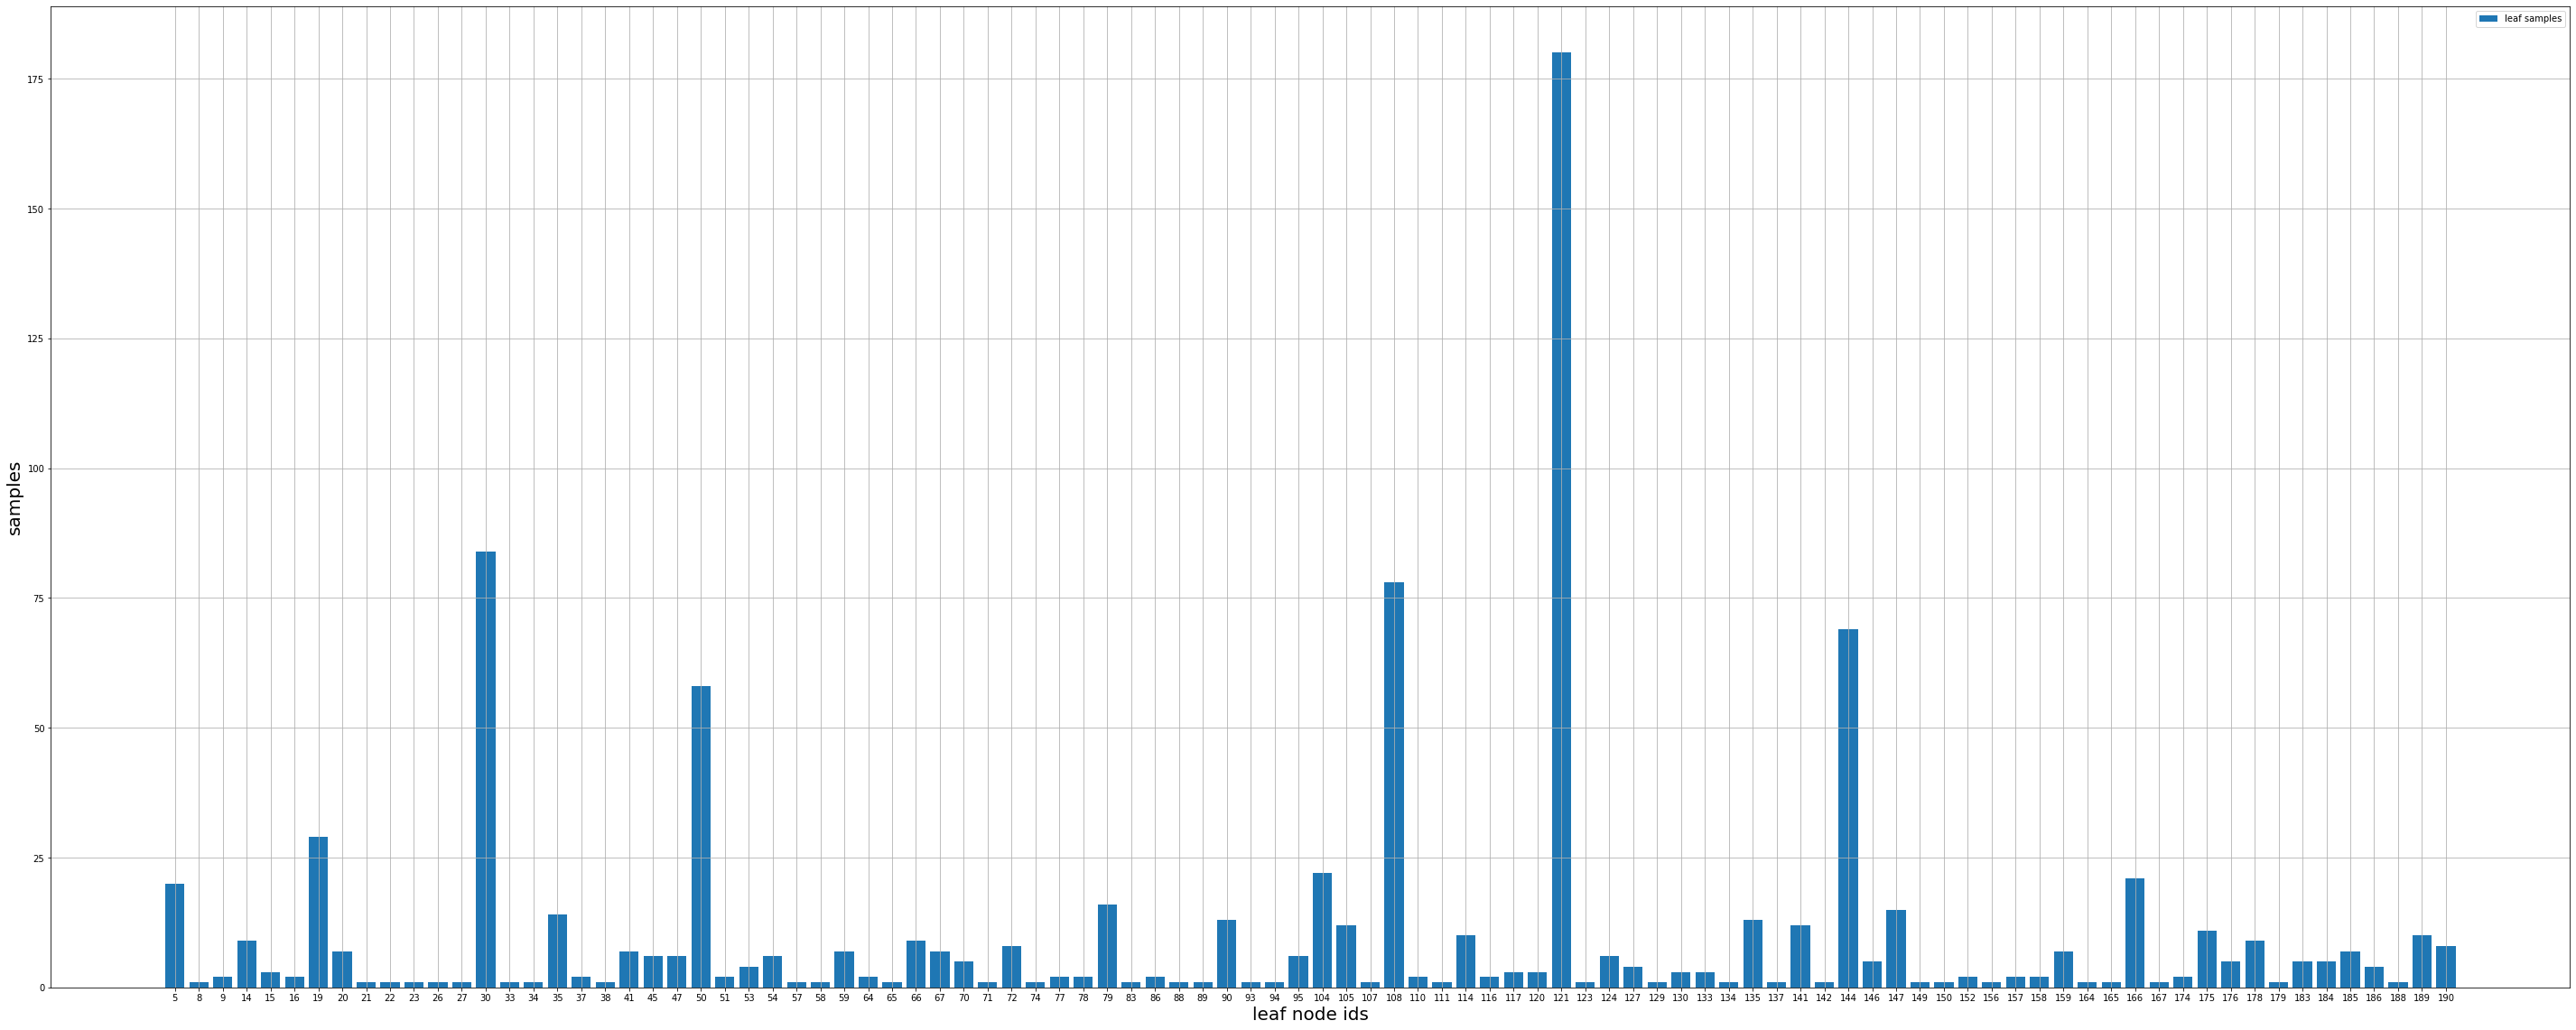

In [63]:
dts.show_leaf_samples(figsize=(50,20))

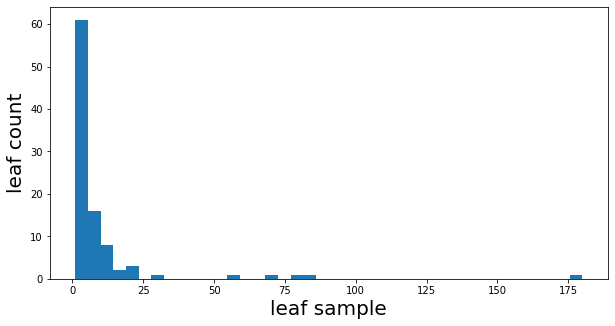

In [64]:
dts.show_leaf_samples_distribution(figsize=(10,5), bins=40)

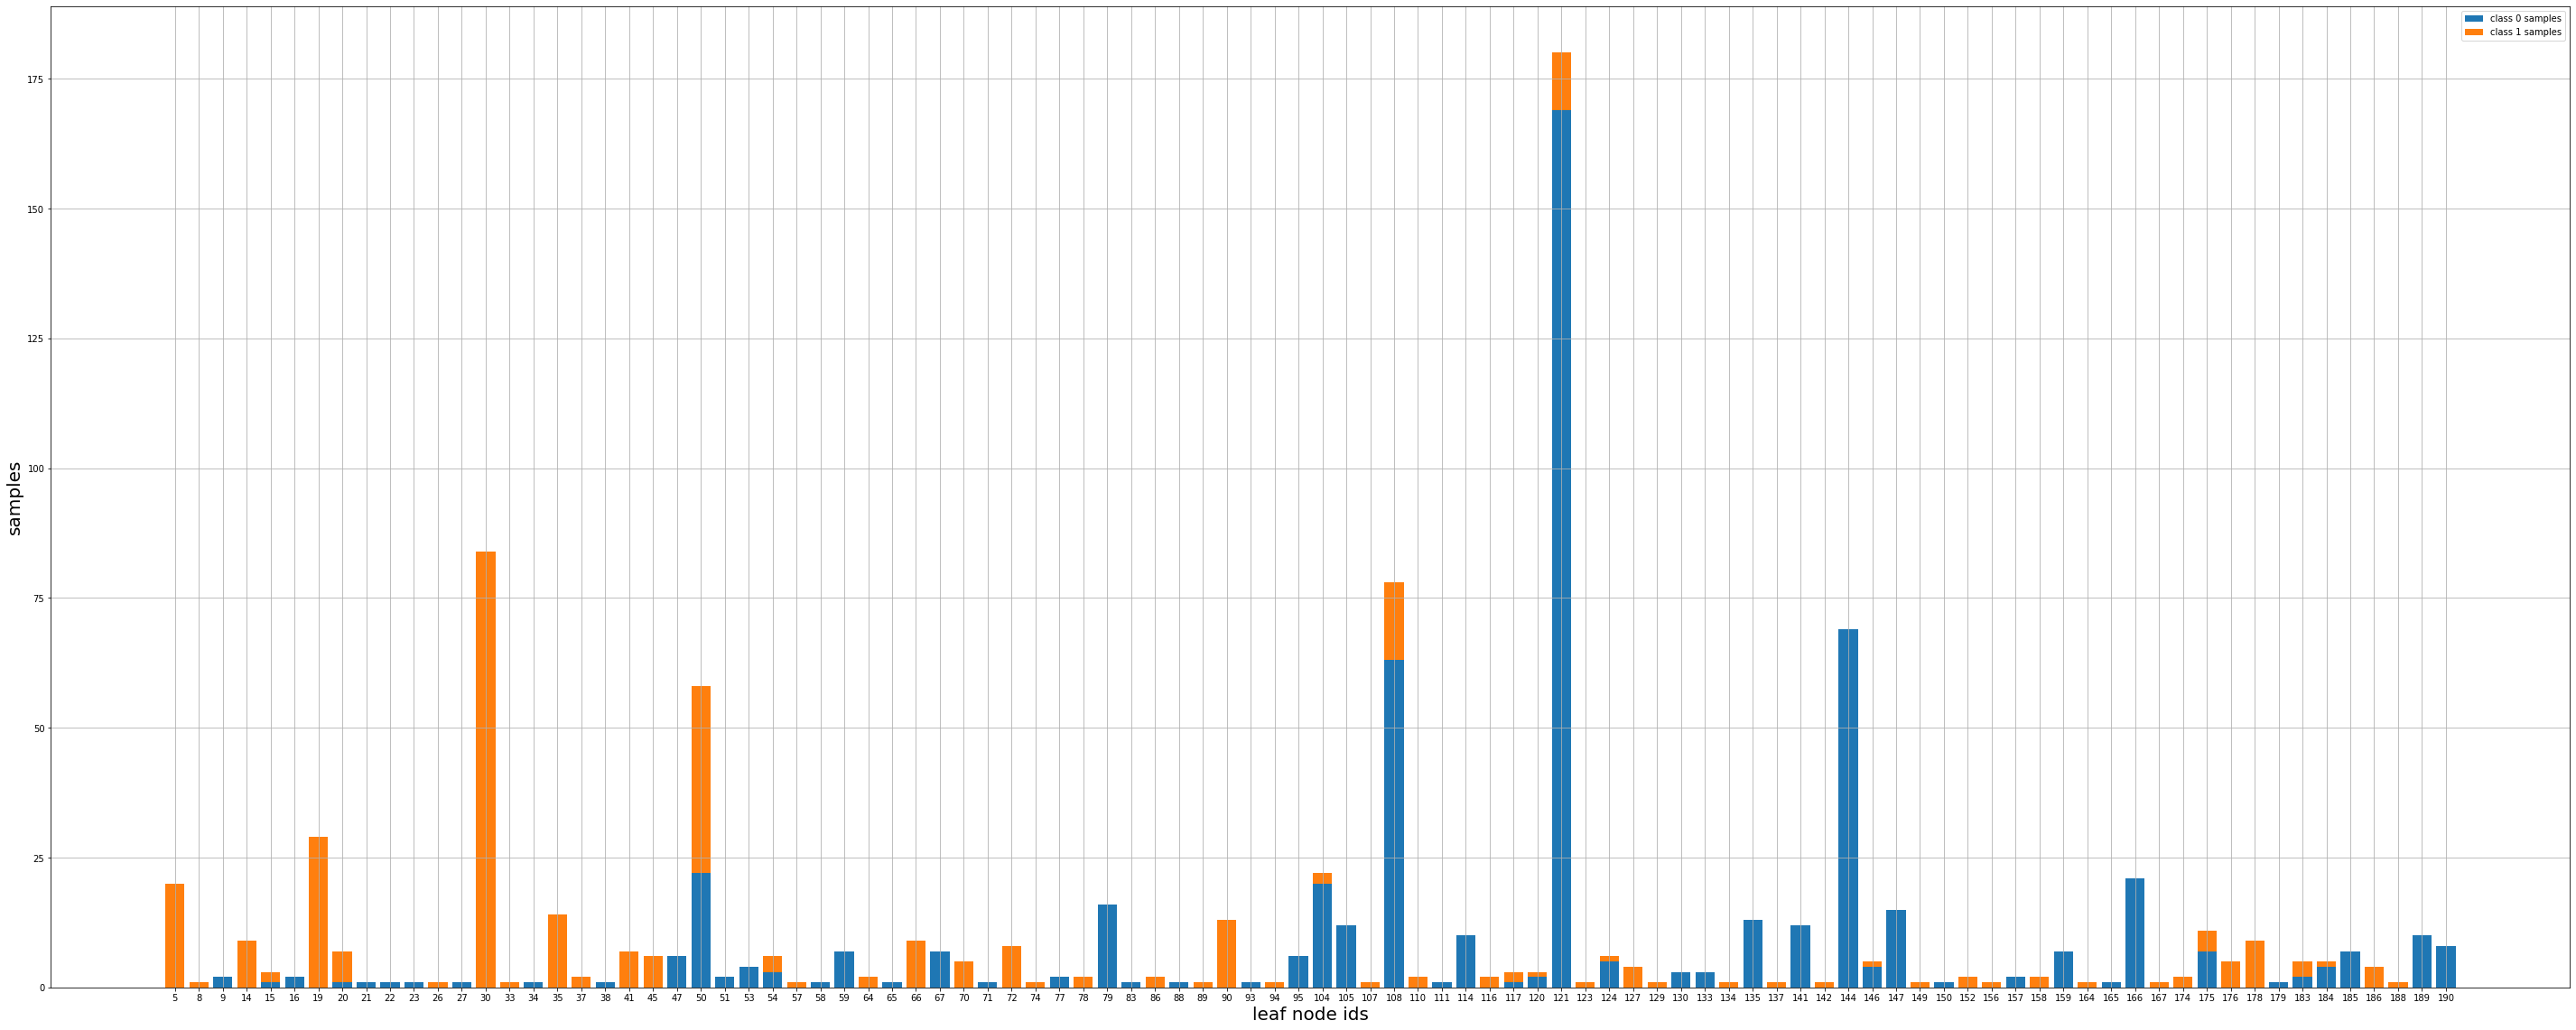

In [65]:
dts.show_leaf_samples_by_class(figsize=(50,20))

In [66]:
dts.get_node_samples(node_id=30).describe()

INFO - decision paths [[1 0 0 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]] 


,pclass,gender_cat,age,sibsp,parch,ticket_cat,fare,cabin_cat,embarked_cat
count,84.000000,84.0,84.000000,84.000000,84.000000,84.00000,84.000000,84.000000,84.000000
mean,1.059524,0.0,34.761074,0.523810,0.297619,367.52381,108.515429,73.095238,0.916667
std,0.238024,0.0,13.306865,0.548298,0.459957,353.11060,86.260323,53.546201,1.032115
min,1.000000,0.0,4.000000,0.000000,0.000000,0.00000,31.683300,-1.000000,-1.000000
25%,1.000000,0.0,24.000000,0.000000,0.000000,73.75000,55.331275,32.250000,0.000000
50%,1.000000,0.0,33.000000,0.500000,0.000000,120.50000,80.929150,72.500000,0.000000
75%,1.000000,0.0,45.000000,1.000000,1.000000,802.25000,134.500000,116.750000,2.000000
max,2.000000,0.0,62.000000,2.000000,1.000000,926.00000,512.329200,183.000000,2.000000


In [67]:
dts.get_node_samples(node_id=144).describe()

,pclass,gender_cat,age,sibsp,parch,ticket_cat,fare,cabin_cat,embarked_cat
count,69.000000,69.0,69.000000,69.0,69.000000,69.000000,69.000000,69.0,69.000000
mean,2.623188,1.0,43.652174,0.0,0.115942,511.333333,12.701388,-1.0,1.652174
std,0.596594,0.0,10.271786,0.0,0.403522,223.455527,12.465235,0.0,0.724083
min,1.000000,1.0,32.500000,0.0,0.000000,177.000000,0.000000,-1.0,0.000000
25%,2.000000,1.0,36.000000,0.0,0.000000,308.000000,7.750000,-1.0,2.000000
50%,3.000000,1.0,40.500000,0.0,0.000000,509.000000,8.050000,-1.0,2.000000
75%,3.000000,1.0,49.000000,0.0,0.000000,729.000000,13.000000,-1.0,2.000000
max,3.000000,1.0,74.000000,0.0,2.000000,886.000000,79.200000,-1.0,2.000000


##### Prediction path through the tree

In [68]:
sample = train[features_v3].iloc[0]
sample

pclass                  3
gender_cat              1
age                    21
age_missing         False
sibsp                   0
parch                   0
ticket_cat            678
fare                 16.1
fare_missing        False
cabin_cat              -1
cabin_missing        True
embarked_cat            2
embarked_missing    False
Name: 685, dtype: object

INFO - Make a prediction for sample pclass                  3
gender_cat              1
age                    21
age_missing         False
sibsp                   0
parch                   0
ticket_cat            678
fare                 16.1
fare_missing        False
cabin_cat              -1
cabin_missing        True
embarked_cat            2
embarked_missing    False
Name: 685, dtype: object
INFO - decision path [  0  80  96  97  98  99 100 112 118 119 121]


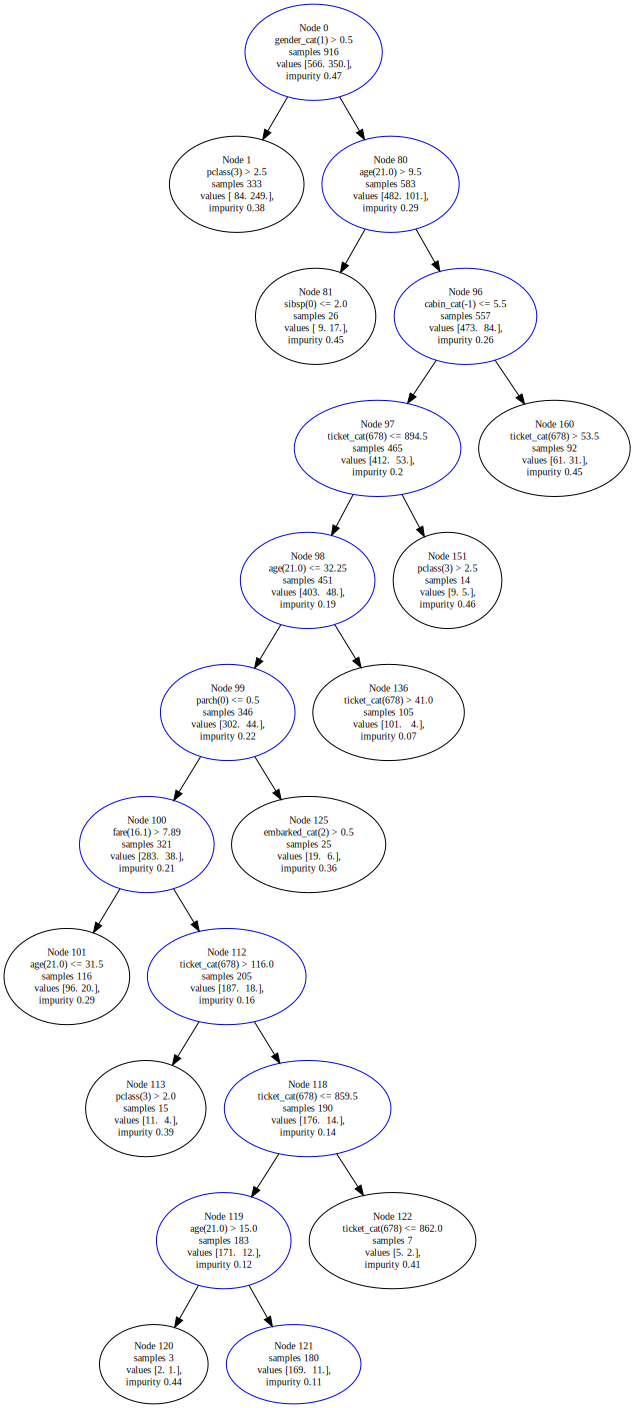

In [69]:
dts.show_decision_tree_prediction_path(sample)

### Error analysis

In [70]:
validation["prediction"] = dt.predict(validation[features_v3])

In [71]:
validation.groupby(["survived", "prediction", "gender"]).size()

survived  prediction  gender
False     False       female     20
                      male      175
          True        female     23
                      male       25
True      False       female      5
                      male       39
          True        female     85
                      male       21
dtype: int64

### Hyperparameter tuning
Hyperparameters are those parameters we can set when we initialize a ML model. Their values can have a big impact 
into model performance.

How do we change them ? First we need to understand if our model is overfitting or underfitting and based on this information to change corresponding hyperparameters values.

Don’t exagerate and spend too much time to tune hyperparameters, especially in the first phase of the project. Would be recommended to spend that time for data understanding, feature engineering.

[DecisionTreeClassifier hyperparamenters](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 

#### max_depth

In [72]:
max_depth_values = [1, 2, 3, 5, 10, 30, 60, 100]
train_accuracy = []
validation_accuracy = []
for depth in max_depth_values:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(train[features_v3], train[target])
    train_accuracy.append(accuracy_score(train[target], dt.predict(train[features_v3])))
    validation_accuracy.append(accuracy_score(validation[target], dt.predict(validation[features_v3])))

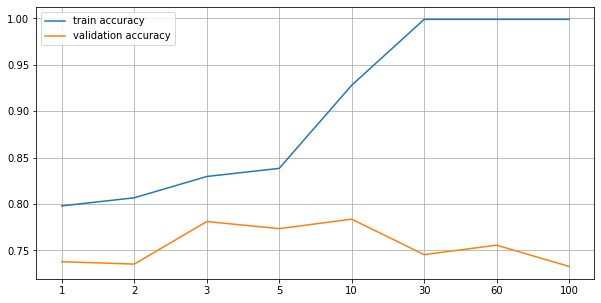

In [73]:
plt.figure(figsize=(10,5))
plt.xticks(range(0, len(max_depth_values)), max_depth_values)
plt.plot(train_accuracy, label="train accuracy")
plt.plot(validation_accuracy, label="validation accuracy")
plt.grid()
plt.legend()

#### min_samples_split
The minimum number of samples required to split an internal node

In [74]:
train_accuracy = []
validation_accuracy = []
min_samples_split_values = [2, 5, 10, 15, 20, 30, 40, 50, 70, 100]
for min_samples_split in min_samples_split_values:
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
    dt.fit(train[features_v3], train[target])
    train_accuracy.append(accuracy_score(train[target], dt.predict(train[features_v3])))
    validation_accuracy.append(accuracy_score(validation[target], dt.predict(validation[features_v3])))

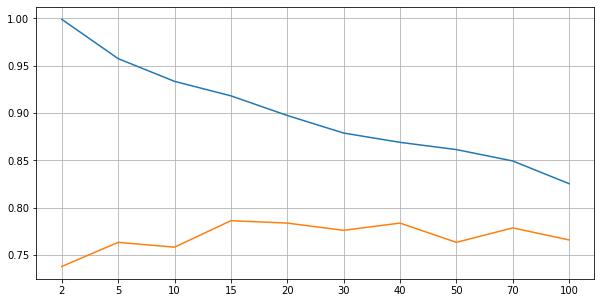

In [75]:
plt.figure(figsize=(10,5))
plt.xticks(range(0, len(min_samples_split_values)), min_samples_split_values)
plt.plot(train_accuracy)
plt.plot(validation_accuracy)
plt.grid()

#### Try multiple hyperparameters  
Trying multiple hyperparameter values in the same time can be done manually or [automatically](https://scikit-learn.org/stable/modules/grid_search.html).

In [76]:
hyperparameters_values = []
train_accuracy = []
validation_accuracy = []
max_depth_values = [1, 2, 3, 5, 10, 30, 60, 100]
min_samples_split_values = [2, 5, 10, 15, 20, 30, 40, 50]

for max_depth in max_depth_values:
    for min_samples_split in min_samples_split_values:
        dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split)
        dt.fit(train[features_v3], train[target])

        hyperparameters_values.append(f"{max_depth},{min_samples_split}")
        train_accuracy.append(accuracy_score(train[target], dt.predict(train[features_v3])))
        validation_accuracy.append(accuracy_score(validation[target], dt.predict(validation[features_v3])))
        

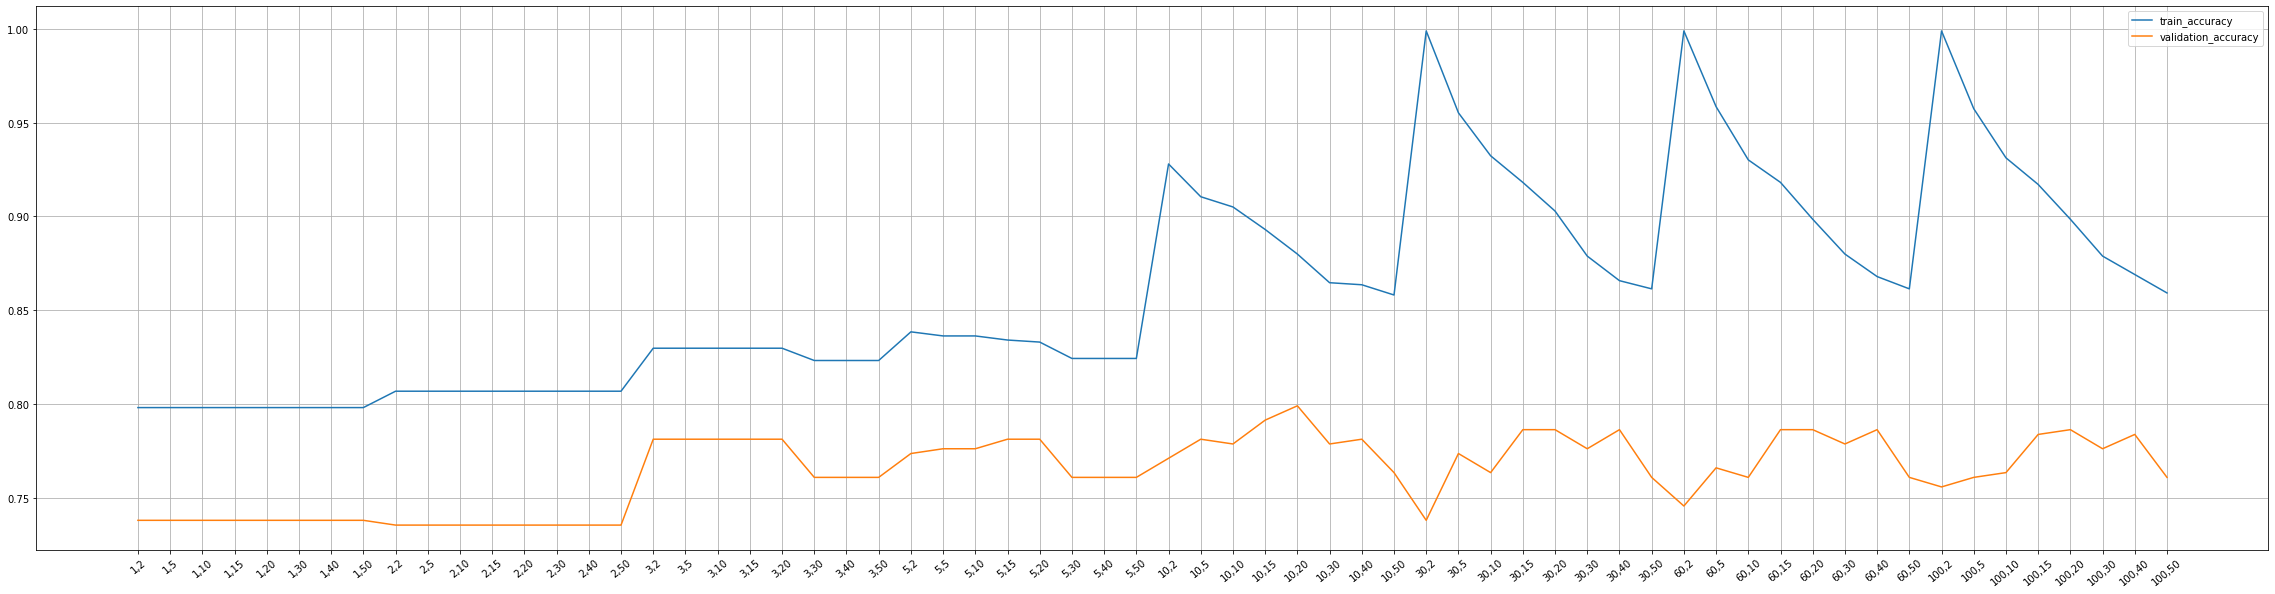

In [77]:
plt.figure(figsize=(40,10))
plt.xticks(range(0, len(hyperparameters_values)), hyperparameters_values, rotation='40')
plt.plot(train_accuracy, label="train_accuracy")
plt.plot(validation_accuracy, label="validation_accuracy")
plt.grid()
plt.legend()

### Final DecisionTree model

In [79]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=2)
dt.fit(dataset[features_v3], dataset[target])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')